# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** Andrew Sivak
    
**NIA** :** 100520897 

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile

In [2]:
F_IMAGE1="chess.jpg"
F_IMAGE2="fence.jpg"

In [3]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

In [4]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([0.5, 0 , -0.5])
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [5]:
NUMPROCESS=4

In [6]:
filtered_image1_VECTOR=filter1
filtered_image2_VECTOR=filter1

In [7]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [8]:
#YOUR CODE MUST BE START HERE

In [9]:
import image_filter as my
import filters_execution as fe
import importlib

In [10]:
importlib.reload(my)
importlib.reload(fe)

<module 'filters_execution' from 'C:\\Users\\andro\\Massive Computing\\Practical Work 01\\Practical Work 01\\filters_execution.py'>

In [11]:
%%time
filtered_image = image1.copy()
filter_o = my.image_filter(image1,filter5,NUMPROCESS,filtered_image)

CPU times: total: 78.1 ms
Wall time: 1.99 s


In [12]:
%%time

filtered_image1 = image1.copy()
filtered_image2 = image1.copy()
filter_o = fe.filters_execution(image1,filter2,filter3,NUMPROCESS,filtered_image1,filtered_image2)

CPU times: total: 188 ms
Wall time: 2.4 s


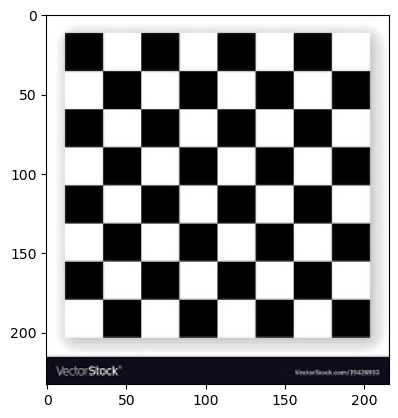

In [13]:
plt.figure()
plt.imshow(image1)

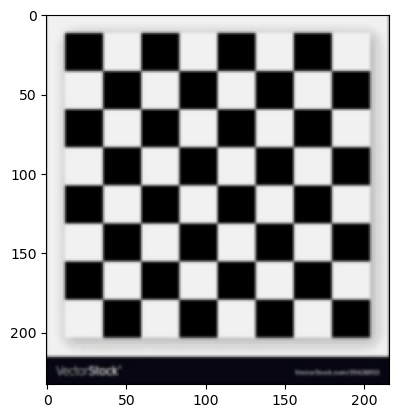

In [14]:
plt.figure()
plt.imshow(filtered_image)

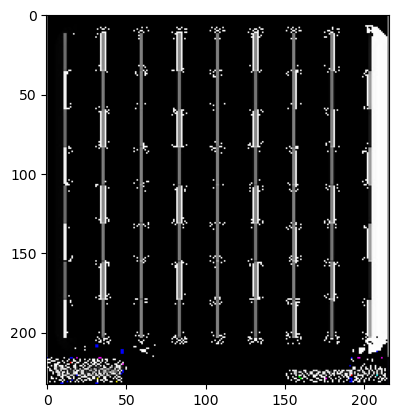

In [15]:
plt.figure()
plt.imshow(filtered_image1)

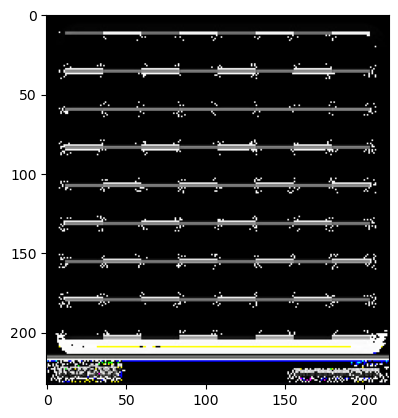

In [16]:
plt.figure()
plt.imshow(filtered_image2)

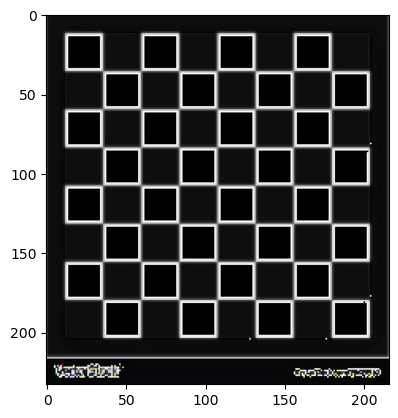

In [17]:
plt.figure()
plt.imshow(image1-filtered_image)

In [ ]:
#YOUR CODE MUST END HERE

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [ ]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

In [ ]:
plt.figure()
plt.imshow(filtered_image1)

In [ ]:
plt.figure()
plt.imshow(filtered_image2)